# 1-隨機森林(Random Forest)

# 2-資料抽樣方法
* Bootstrap(自助法)
* Bagging
* Boosting(提升)

[參考資料](https://www.jianshu.com/p/708dff71df3a)

## 2.1-Bootstrap構造流程

 * 目標: 統計魚塘里面的魚的條數
1. 撈100條，都打上標籤(構造樣本)，並放回去
2. 重新撈100條，發現裡面有標記的魚12條，記下為12%，並放回去
3. 重新撈100條，發現裡面有標記的魚9條，記下為9%，並放回去
4. 重新撈100條，發現裡面有標記的魚10條，記下為10%
5. 因此可以推測(魚塘里面的魚的條數)=$ \frac{100}{10%}=1000 $

## 2.2-Bagging構造流程

## 2.3-Boosting構造流程

# 3-資料集(鐵達尼號資料集)
* train.csv: 訓練的資料集
* test.csv: 測試的資料集

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv("./data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 4-遺漏值的處理
 * (連續數值)的缺失處理:
1. 以(平均值)取代
2. 以(中位數)取代

 * (類別數值)的缺失處理:
1. 如果缺失數量較少,則以(數量最多的類別)進行取代
2. 如果缺失數量過多,則直接捨棄該欄位

In [3]:
# 找出所有(遺漏值)
# True:是(遺漏值)
# False:不是(遺漏值)
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# 統計各個欄位的(遺漏值)數量
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Age屬於(連續數值)
# 缺失處理: 以(中位數)取代
df["Age"] = df["Age"].fillna(df["Age"].median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# 再次查看缺失統計
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Cabin屬於(類別數值)
# 缺失處理: 因為缺失數量過多,因此直接捨棄該欄位
df = df.drop(["Cabin"], axis = 1)

In [8]:
# Embarked屬於(類別數值)
print(df['Embarked'].value_counts()) # 統計該欄位的類別數量
print("Embarked 最常出現:", df['Embarked'].value_counts().idxmax()) # 最常出現的類別

# 缺失處理: 以(數量最多的類別)進行取代
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
Embarked 最常出現: S


In [9]:
# 再次查看缺失統計
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 5-One-Hot Encoding

In [10]:
# One-Hot Encoding之前
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
# 創造出 one-hot 欄位
dummy = pd.get_dummies(df['Embarked']) # 加入新欄位(Embarked 的 one-hot)
# concat 是連結的意思
# axis = 0 指的是垂直的連接
# axis = 1 指的是水平的連接
df = pd.concat([df, dummy], axis=1)
df = df.drop(["Embarked"], axis = 1) # 移除舊欄位(Embarked)


dummy = pd.get_dummies(df['Sex'])
df = pd.concat([df, dummy], axis=1)
df = df.drop(["Sex"], axis = 1)

# One-Hot Encoding之後
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0,0,1


In [10]:
s = df['Name'].str.split(",", expand = True)[1]
s = s.str.split(" ", expand = True)[1]
s

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: 1, Length: 891, dtype: object

# 6-特殊需求

## 6.1-(name欄位)只保留較常出現的謂稱[Mr,Mrs,Miss]

In [12]:
# 謂稱數量統計
s = df['Name'].str.split(",", expand = True)[1]
s = s.str.split(" ", expand = True)[1]
pd.crosstab(s, df['Survived']).T

Survived,0,1
1,,
Capt.,1,0
Col.,1,1
Don.,1,0
Dr.,4,3
Jonkheer.,1,0
Lady.,0,1
Major.,1,1
Master.,17,23
Miss.,55,127


In [13]:
def name_filter(data):
    if data == 'Mr.':
        return 'Mr'
    elif data == 'Mrs.':
        return 'Mrs'
    elif data == 'Miss.':
        return 'Miss'
    else:
        return 'Unknown'

df['Name'] = s.apply(name_filter) # 重新定義謂稱

# 進行One-Hot Encoding
dummy = pd.get_dummies(df['Name'])
df = pd.concat([df, dummy], axis=1)
df = df.drop(["Name"], axis = 1) # 移除(name欄位)
df = df.drop(["Unknown"], axis = 1) # 移除 One-Hot Encoding 產生的(Unknown欄位)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,1,0,3,22.0,1,0,A/5 21171,7.2500,0,0,1,0,1,0,1,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,1,0,0,1,0,0,0,1
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0,1,0,0
3,4,1,1,35.0,1,0,113803,53.1000,0,0,1,1,0,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,0,0,1,0,1,0,0,0
887,888,1,1,19.0,0,0,112053,30.0000,0,0,1,1,0,1,0,0
888,889,0,3,28.0,1,2,W./C. 6607,23.4500,0,0,1,1,0,1,0,0
889,890,1,1,26.0,0,0,111369,30.0000,1,0,0,0,1,0,1,0


## 6.2-直接捨棄部分欄位
 * (Ticket欄位)數字太多，沒有一個很直覺的規律，所以將其丟棄
 * (PassengerId)只是一個一直增加的數，也並不影響我們的結果，所以也先將其丟棄

In [14]:
df = df.drop(["Ticket"], axis = 1)
df = df.drop(["PassengerId"], axis = 1)

# 7-切割資料集

In [15]:
from sklearn.model_selection import train_test_split
# 把資料分成兩部分 (1. 訓練資料 2. 測試資料)
data_train, data_test, target_train, target_test = train_test_split(
    df.drop(["Survived"], axis = 1),
    df['Survived'],
    test_size=0.1)

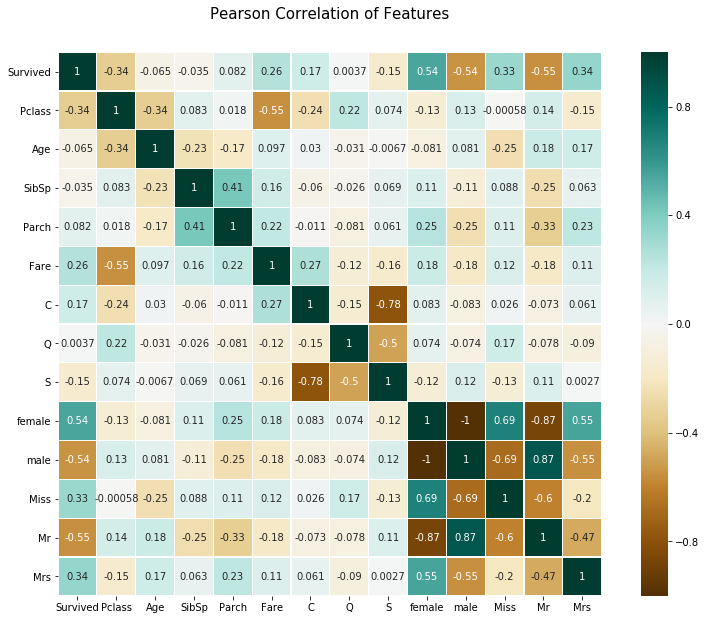

In [16]:
# 繪製熱圖(heatmap)
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), 
            cmap = "BrBG",
            linewidths=0.1, 
            square=True, 
            linecolor='white',
            annot=True)

# 8-以(決策樹)進行分類

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 20)
clf = clf.fit(data_train, target_train)

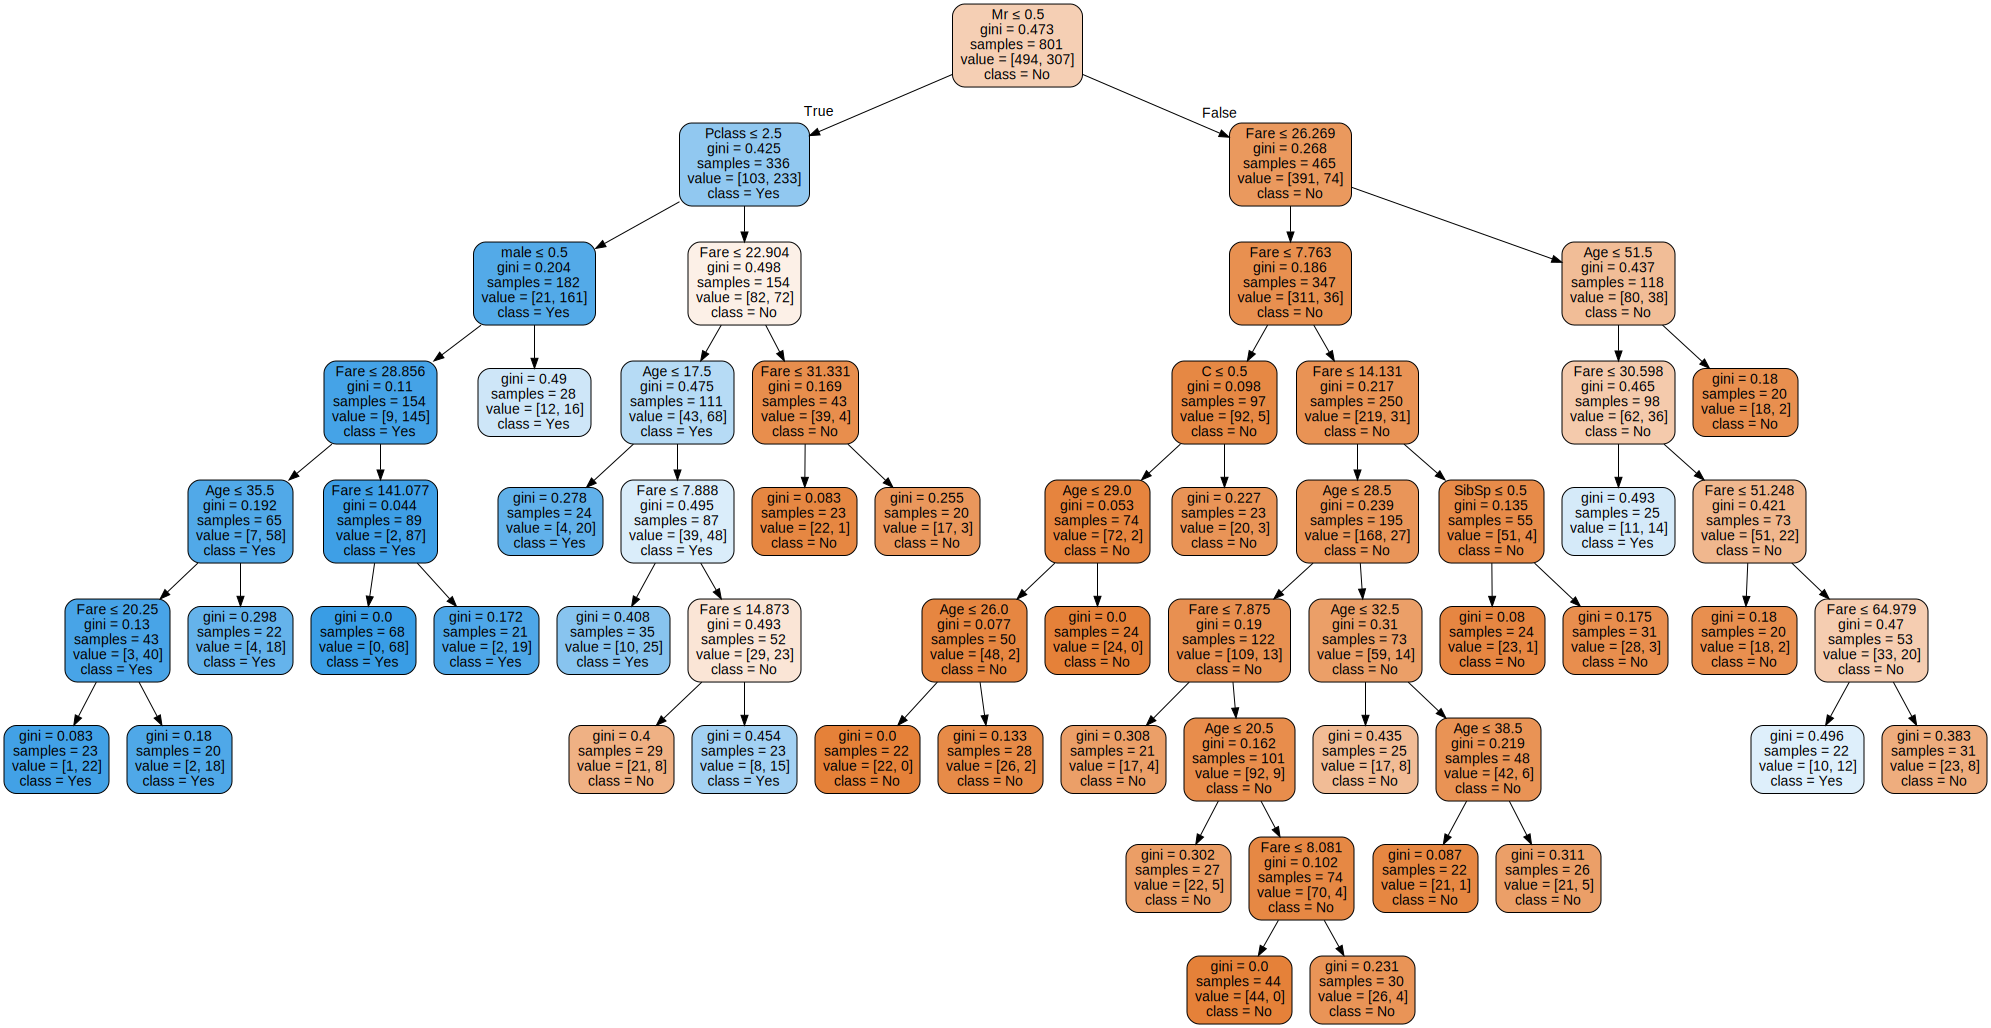

In [19]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None,
feature_names=df.drop(["Survived"], axis = 1).columns,
                      class_names=["No", "Yes"],
                      filled=True, 
                      rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [20]:
from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print("預測:", predict)
print("正確標籤:", list(target_test))
print("正確率: ", accuracy_score(target_test, predict) * 100, "%")

預測: [1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1
 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0]
正確標籤: [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0]
正確率:  81.11111111111111 %


# 9-以(隨機森林)進行分類

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 26, max_depth = 6)

In [24]:
# 這裡就不用 fit 了, fit 和 predict 會由交叉驗證幫你做, cv 參數代表要幾次的交叉驗證
import numpy as np
from sklearn.model_selection import cross_val_score
count = 20
scores = cross_val_score(clf, 
                         df.drop(["Survived"], axis = 1),
                         df['Survived'], 
                         cv = count)
print(str(count)+"次分數:", scores)
# 由於 score 是 ndarray, 可以直接使用 average 來計算平均
print("平均:", np.average(scores))

20次分數: [0.73333333 0.91111111 0.82222222 0.82222222 0.75555556 0.75555556
 0.84444444 0.88888889 0.95555556 0.84444444 0.82222222 0.84090909
 0.79545455 0.84090909 0.79545455 0.77272727 0.81818182 0.88636364
 0.81818182 0.88636364]
平均: 0.8305050505050506


# 10-進行預測

In [27]:
from sklearn.ensemble import RandomForestClassifier
# 6 or 7 is good
clf = RandomForestClassifier(n_estimators = 26, max_depth = 6)
clf = clf.fit(df.drop(["Survived"], axis = 1), df['Survived'])

In [28]:
# 對(test.csv)進行資料處理,流程與(train.csv)相同
test_df = pd.read_csv("./data/test.csv")
result_df = pd.DataFrame(columns = ["PassengerId", "Survived"])
result_df["PassengerId"] = test_df["PassengerId"]

test_df = test_df.fillna(df.median())
test_df = test_df.drop(["Cabin"], axis = 1)
test_df['Embarked'] = test_df['Embarked'].fillna("S")
dummy = pd.get_dummies(test_df['Embarked'])
test_df = pd.concat([test_df, dummy], axis=1)
test_df = test_df.drop(["Embarked"], axis = 1)
test_df = test_df.drop(["Ticket"], axis = 1)
test_df = test_df.drop(["PassengerId"], axis = 1)
dummy = pd.get_dummies(test_df['Sex'])
test_df = pd.concat([test_df, dummy], axis=1)
test_df = test_df.drop(["Sex"], axis = 1)
s = test_df['Name'].str.split(",", expand = True)[1]
s = s.str.split(" ", expand = True)[1]
test_df['Name'] = s.apply(name_filter)
dummy = pd.get_dummies(test_df['Name'])
test_df = pd.concat([test_df, dummy], axis=1)
test_df = test_df.drop(["Name"], axis = 1)
test_df = test_df.drop(["Unknown"], axis = 1)
test_df

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,3,34.5,0,0,7.8292,0,1,0,0,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,0,1,0,1,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,0,0,1,0,1,0,1,0
414,1,39.0,0,0,108.9000,1,0,0,1,0,0,0,0
415,3,38.5,0,0,7.2500,0,0,1,0,1,0,1,0
416,3,28.0,0,0,8.0500,0,0,1,0,1,0,1,0


In [31]:
# 進行預測
pre = clf.predict(test_df)
result_df["Survived"] = pre
result_df.to_csv("./data/result_test.csv", index = False)
# result_df